In [32]:
!pip install mlxtend

    100% |████████████████████████████████| 1.3MB 4.1MB/s ta 0:00:01
    100% |████████████████████████████████| 296kB 6.3MB/s ta 0:00:01


# Import libraries

In [2]:
import pandas as pd
import pandas_profiling
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib.ticker as mtick
from sklearn.linear_model import LinearRegression
from mlxtend.plotting import plot_linear_regression
from sklearn.metrics import mean_absolute_error

# Read .csv

In [3]:
data = pd.read_csv('Data/ml.csv')

# Check info

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207156 entries, 0 to 207155
Data columns (total 15 columns):
date_submitted                207156 non-null int64
is_banked                     207156 non-null int64
score                         207156 non-null float64
code_module                   207156 non-null object
code_presentation             207156 non-null object
gender                        207156 non-null object
region                        207156 non-null object
highest_education             207156 non-null object
imd_band                      207156 non-null object
age_band                      207156 non-null object
num_of_prev_attempts          207156 non-null int64
studied_credits               207156 non-null int64
disability                    207156 non-null object
final_result                  207156 non-null object
module_presentation_length    207156 non-null int64
dtypes: float64(1), int64(5), object(9)
memory usage: 23.7+ MB


Change categorical columns to objects.

In [6]:
data['is_banked'] = data['is_banked'].apply(str)
data['code_module'] = data['code_module'].apply(str)
data['code_presentation'] = data['code_presentation'].apply(str)

Separate the target and the rest of the columns.

In [7]:
data_data = data[['date_submitted', 'num_of_prev_attempts', 'studied_credits', 'module_presentation_length']]
data_target = data["score"]

Initialize the model in the variable `data_model`

In [8]:
data_model = LinearRegression()

Fit the model and print the intercept and coefficients of the model. 

In [9]:
# Your code here:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(data_data, data_target, test_size=0.2)

In [10]:
data_model.fit(X_train, y_train)
print('Intercept: {}'.format(data_model.intercept_))
print ('')
print('Coef : {}'.format(data_model.coef_))

Intercept: 72.05286835928253

Coef : [-0.01158942 -2.99924762 -0.02096951  0.02643616]


In [11]:
from sklearn.metrics import r2_score

TRAIN MODEL METRICS:
The R2 score is: 0.00981373828288079
The MAE score is: 14.746144596799349


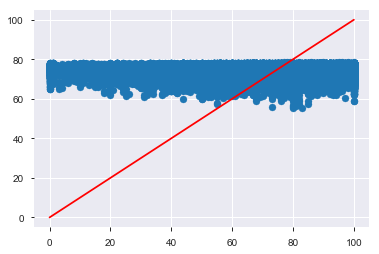

In [12]:
# Predict para el train

y_pred=data_model.predict(X_train)

r2 = r2_score(y_train, y_pred)
mae = mean_absolute_error(y_train, y_pred)
print ('TRAIN MODEL METRICS:')
print('The R2 score is: ' + str(r2))
print('The MAE score is: ' + str(mae))

plt.scatter(y_train, y_pred)
plt.plot([0,100], [0,100], color='red')
plt.show()

TRAIN MODEL METRICS:
The R2 score is: 0.00981373828288079
The MAE score is: 14.865066337657307


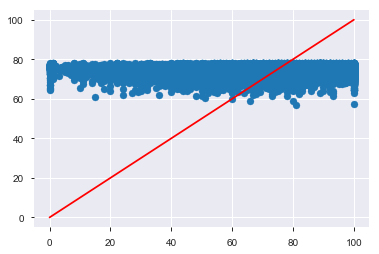

In [13]:
# Predict para el test

y_test_pred=data_model.predict(X_test)

r2 = r2_score(y_train, y_pred)
mae = mean_absolute_error(y_test, y_test_pred)
print ('TRAIN MODEL METRICS:')
print('The R2 score is: ' + str(r2))
print('The MAE score is: ' + str(mae))

plt.scatter(y_test, y_test_pred)
plt.plot([0,100], [0,100], color='red')
plt.show()

Clearly there are no linear realtions between our data.